# Supervised learning- regression

A real estate agent currently only has Single-Family housed in his portfolio. He wants to expand his business to apartments, but he doesn't have enough experience to give reliable appraisels. Getting the necessary experience would take a lot of time and he doesn't have any colleagues to fall back on. He knows we are following a machine learning course and has a brilliant idea. He give us a data-set with a lot of information on real estate, including the known selling price (tx_price).  He asks us to build a real-estate pricing model for apartmens.

We already cleaned this dataset in the first class (the data hasn't been standardized yet). Perform a simple linear regression and polynomial regression to predict the price for apartments.

## 0. Loading packages and dataset

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('real_estate_cleaned.csv')

The dataset is already cleaned, but not standardized yet. We will take a quick look at the data to get to know the dataset.

# 1. Take a look at the data
1. Look at the dimensions (number of features and observations)
2. Look at the first 5 rows
3. Look at the different features and there data types
    + What do you notice with regard to the datatypes of the one-hot encoded features?
    + Fix this




1. Dimensions

In [ ]:
df.shape

2. First rows

In [ ]:
df.head(5)

3. Data types

In [ ]:
df.info()

You should have noticed that they are not in the correct data type. Convert them to uint8, using '.astype(np.uint8)'

In [ ]:
df.iloc[:,25:39] = df.iloc[:,25:39].astype(np.uint8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-n

# 2 Train/test-split and standardisation

1. Shuffle your data

2. Make a Train/test
    - Use random state=123 whenever needed
    - Use a test size of 20%
    
3. Standardize both datasets  
    + Make sure you only standardise the numerical features


1. Shuffle

In [16]:
from random import Random
df_shuffle = df.sample(frac=1, random_state=123)


2. Train/test-split

In [29]:
# Import the function
from sklearn.model_selection import train_test_split

# Split of feaures and outcomes
X = df_shuffle.drop(columns='tx_price')
y = df_shuffle['tx_price']

# Perform train/test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


3. Standardize

In [27]:
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[num_feat])

X_train_stan = X_train.copy()
X_test_stan = X_test.copy()

X_train_stan[num_feat] = scaler.transform(X_train[num_feat])
X_test_stan[num_feat] = scaler.transform(X_test[num_feat])

# 3. Linear regression
1. Train a linear regression model, using the standardized data.
2. Test the trained model on the train and the test set.
    + Predict the price of the appartments
    + Calculate the coefficient of determination
    + Calculate the Mean Absolute Error (MAE)
    + Calculate the Mean Square Error (MSE)
    + Would you say this model is overfitted, underfitted or neither?



1. Train

In [59]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train_stan, y_train)

LinearRegression()

2. Evaluating the model
    + make predictions

In [37]:
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

   + Coefficient of determination

In [49]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.6046576013789591
0.5432253727428296


In [60]:
#alternative code
from sklearn.metrics import r2_score
print(r2_score(y_train, predictions_train))
print(r2_score(y_test, predictions_test))
print('The model is +/- 60% te verklaren op train data set')
print('The model is +/- 54% te verklaren op test  data set')


0.6046576013789591
0.5432253727428296
The model is +/- 60% te verklaren op train data set
The model is +/- 54% te verklaren op test  data set


+ MAE


In [57]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, predictions_train))
print(mean_absolute_error(y_test, predictions_test))

0.14866924781510615
0.16215242761365642


+ MSE

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_test)
print(mean_squared_error(y_train, predictions_train))
print(mean_squared_error(y_test, predictions_test))

print('the test evaluation is not lower then the train evaluation, so the model is not overfitted')
print('an 54% dat te verklaren valt is niet erg hoog, dus is ons model underfitted')

0.03609999433239679
0.048366308920755725
the test evaluation is not lower then the train evaluation, so the model is not overfitted
an 54% dat te verklaren valt is niet erg hoog, dus is ons model underfitted


# 2. Polynomial regression
## 2.1 Quadratic model

We will do a quadratic polynomial regression to see if we can improve the reliability of the model.
1. Design polynomial features with degree 2
    + Don't forget to also transform the test data
    + Check the number of features of the new datasets
2. Fit a linear regression to the polynomial features
    + Use the 'fit_intercept=False'-argument
3. Evaluate the train and test-set, using R^2
    +  Would you say this model is overfitted, underfitted or neither?



1. Design the features

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_stan)
X_test_poly = poly.transform(X_test_stan)


In [70]:
#check the nuX_train_poly = poly.fit_transform(X_train_stan)
X_train_poly.shape

(642, 780)

2. Fit the linear regression

In [66]:
# Define the model
reg_quad = LinearRegression(fit_intercept=False)

#Fit the model
reg_quad.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [67]:
# Evaluate
print(reg_quad.score(X_train_poly, y_train))
print(reg_quad.score(X_test_poly, y_test))

print('the modal is overfittted with a great score of 99%. But when predicting new valus, i fails very bad.')

0.9911705428351142
-5631.044493371921


## 2.2 Higher order polynomial model

1. Do a cross-validation to find the optimal order for the polynomial.
    + Use a pipeline that entails two steps: engineering the polynomial features and fitting the regression
    + Let the degree of the polynomial range from 1 to 4.
    + Ask python to print out the R^2 for each degree
    + What do you expect to happen? Will increasing the degree of the polynomial solve the overfitting or just make it worse?
    
2. Make a plot of the cross-validation results
     + Did your expectation come true?
    + Overfitted or underfitted?

1. Cross-validation

In [73]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

avg_scores = [None] * 5

for i in np.arange(1,6):

    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
                         ('linear', LinearRegression(fit_intercept=False))])

    scores = cross_val_score(reg_poly, X_train_stan, y_train, scoring= 'r2', cv=5)

    avg_scores[i-1] = scores.mean()

    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

Order 1: avg R^2 = 0.5331973447169984
Order 2: avg R^2 = -41.502029366696824
Order 3: avg R^2 = -87.30806747049651
Order 4: avg R^2 = -424.8221244924031
Order 5: avg R^2 = -3610.0598735956346


2. plot

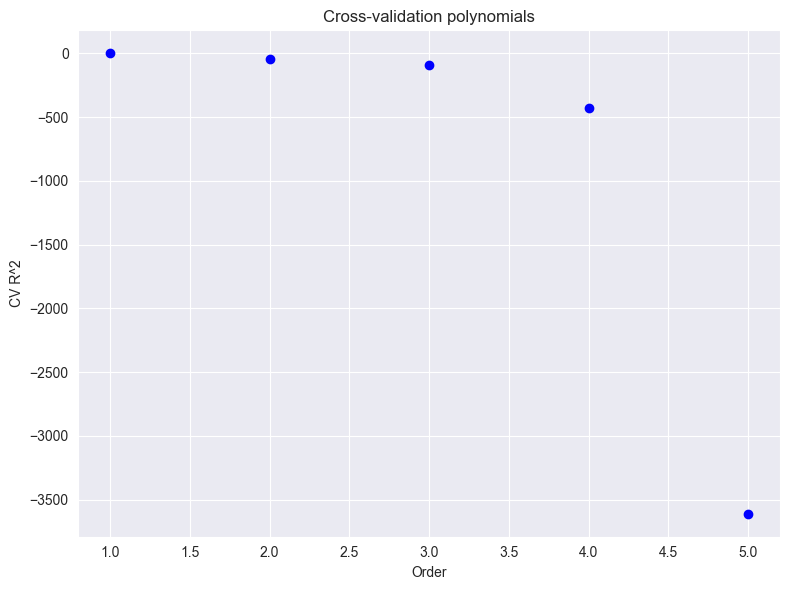

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()